In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, pickle
import pandas as pd
import seaborn as sns
rng = np.random.default_rng()

In [2]:
NE, NI, N_syl, N_HVC_per_syl = 600, 150, 1, 1
N_HVC = N_syl * N_HVC_per_syl

In [3]:
fnames = glob.glob('results/EI_1HVC*.pkl')
df = dict(fid=[], state=[], exp=[], stage=[], hE_std=[])
for fname in fnames:
    with open(fname, 'rb') as f:
        d = pickle.load(f)
    for k1, n1 in zip(('fp', 'lc'), ('FP', 'Seq')):
        for k2, n2 in zip(('_pre', '_post'), ('Before Learning', 'After Learning')):
            for k3, v in d[k1+k2].items(): # Experiments
                if k3 == 'spon':
                    k3 = 'Spont.'
                if 'Singing' not in k3:
                    n2 = 'Unaffected by\nLearning'
                if n2 == 'Before Learning':
                    if 'Singing' in k3:
                        k3 = 'Singing\n(Before Learn)'
                    else:
                        continue # discard
                df['hE_std'].append(np.mean(v))
                df['exp'].append(k3)
                df['fid'].append(int(fname[:-4].split('_')[-1]))
                df['state'].append(n1)
                df['stage'].append(n2)

In [4]:
df = pd.DataFrame(df)

In [5]:
order = ['Spont.'] + sorted(df.exp.unique())[:-1]
hue_order = ['Before Learning', 'After Learning', 'Unaffected by\nLearning']

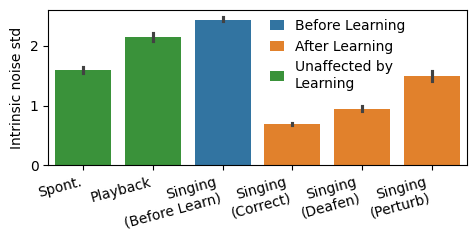

In [16]:
fig, ax = plt.subplots(1, figsize=(5, 2.5))
sns.barplot(df[df.state=='FP'], x='exp', y='hE_std', hue='stage', ax=ax,
            order=order, hue_order=hue_order)
ax.legend(title='', ncol=1, frameon=False, bbox_to_anchor=(0.5,0.4), handlelength=1)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=15, ha='right')
ax.set(xlabel='', ylabel='Intrinsic noise std')
fig.tight_layout()
fig.savefig('reduce_noise.svg')

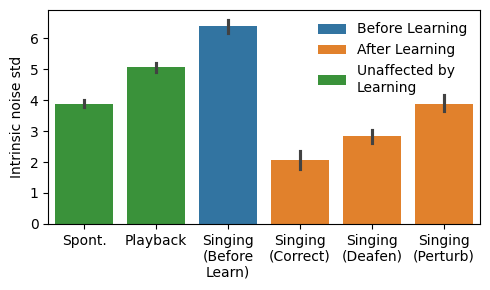

In [7]:
fig, ax = plt.subplots(1, figsize=(5, 3))
sns.barplot(df[df.state=='Seq'], x='exp', y='hE_std', hue='stage', ax=ax, 
            order=order, hue_order=hue_order)
ax.legend(title='', ncol=1, frameon=False, loc='upper right')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
ax.set(xlabel='', ylabel='Intrinsic noise std')
fig.tight_layout()